## Linear Function Approximator

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class LinearFunctionApproximator: ## linear to phi(s)
    def __init__(self, num_features):
        self.theta = np.random.rand(num_features)

    def predict(self, phi_s):
      return np.dot(self.theta, phi_s)

    def update(self, phi_s, target):
        prediction = self.predict(phi_s)
        error = target - prediction
        self.theta += 0.1 * error * phi_s


In [ ]:
num_features = 2
approximator = LinearFunctionApproximator(num_features)
num_episodes = 1000

for episode in range(num_episodes):
    phi_s = np.random.rand(num_features)
    target_value = 10 * phi_s[0] + 5 * phi_s[1]
    approximator.update(phi_s, target_value)

test = np.array([0.8, 0.2])
predicted_value = approximator.predict(test)
print(f"Predicted Value for phi_s {test}: {predicted_value}")
print(approximator.theta)

Predicted Value for phi_s [0.8 0.2]: 8.99987604837459
[9.99979815 5.00018764]


error =  target - $R_{t+1} + \lambda*\theta*\phi(s+1) + \theta*\phi(s)$

## Sin

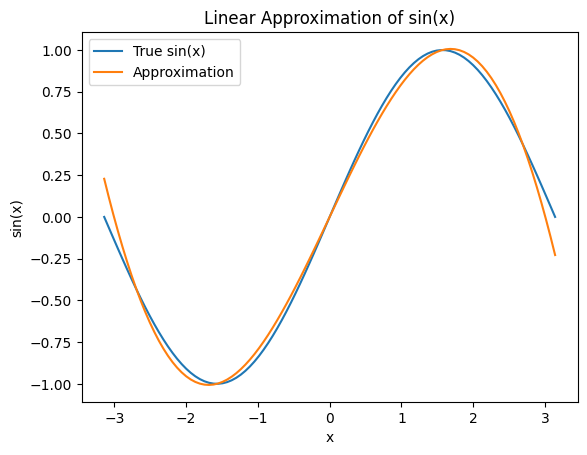

In [ ]:
num_terms = 3
approximator = LinearFunctionApproximator(num_terms)
num_episodes = 1000

for episode in range(num_episodes):
    x = np.random.uniform(-np.pi, np.pi)
    features = np.array([x**i / np.math.factorial(i) for i in range(1, 2 * num_terms, 2)])
    target_value = np.sin(x)
    approximator.update(features, target_value)


test_x_values = np.linspace(-np.pi, np.pi, 100)
predicted_values = [approximator.predict([x**i / np.math.factorial(i) for i in range(1, 2 * num_terms, 2)]) for x in test_x_values]

plt.plot(test_x_values, np.sin(test_x_values), label='True sin(x)')
plt.plot(test_x_values, predicted_values, label='Approximation')
plt.legend()
plt.title('Linear Approximation of sin(x)')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

## Policy Gradient in Reinforcement Learning

First, please install the required packages and import these modules.

In [ ]:
%%capture
!pip install python-opengl
!pip install ffmpeg
!pip install xvfb
!pip install pyvirtualdisplay
!pip install pyglet==1.5.1
!pip install imageio-ffmpeg
!pip install pyyaml==6.0
!pip install git+https://github.com/ntasfi/PyGame-Learning-Environment.git
!pip install git+https://github.com/simoninithomas/gym-games


In [ ]:
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

# Gym
import gym
import gym_pygame

import imageio

In policy gradient, the action $a$ is picked up by the distribution $P$ which depends on policy $\pi$.<br>
To say more clearly, the distibution of action is $ P(a | \pi_\theta (s)) $, where $ \pi_\theta (s) $ is policy and $\theta$ is parameters for this policy. When the current state $s$ is given, the distribution of action $a$ is determined by this policy.

In this CartPole example, we assume that $P(\cdot)$ is a categorical distribution (because action space is discrete) and $\pi_\theta (s)$ is the following fully-connected network (fcnet).<br>
In this example, the output of this policy $\pi_\theta (s)$ will be logits value, which determines categorical distribution $P(\cdot)$.

![](https://www.researchgate.net/publication/360910430/figure/fig1/AS:11431281080452861@1661307888574/Deep-reinforcement-learning-scheme-A-deep-neural-network-learns-the-policy_W640.jpg)

> Note : When logits $v_0, v_1$ are given, the probabilities are $\frac{e^{v_0}}{e^{v_0}+e^{v_1}}, \frac{e^{v_1}}{e^{v_0}+e^{v_1}}$ respectively.

First, we implement $\pi_\theta (s)$ (fully-connected network) using PyTorch as follows.

### impelement network

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class Policy(nn.Module):
    def __init__(self, s_size, a_size, h_size):
        # s_size =
        # h_size =
        # a_size =
        super(Policy, self).__init__()
        # self.fc1 = ...
        self.fc1 = nn.Linear(s_size, h_size)
        self.fc2 = nn.Linear(h_size, a_size)


        # self.fc2 = ...

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        out = F.softmax(x, dim=1)
        return out

    def act(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        probs = self.forward(state).cpu()

        m = Categorical(probs)

        action = m.sample()
        return action.item(), m.log_prob(action)

### define environment
https://gymnasium.farama.org/environments/classic_control/

In [ ]:
env_id = "CartPole-v1"
# Create the env
env = gym.make(env_id)

# Create the evaluation env
eval_env = gym.make(env_id)

# Get the state space and action space
s_size = env.observation_space.shape[0]
a_size = env.action_space.n
print(env.action_space.shape)

()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
print("_____OBSERVATION SPACE_____ \n")
print("The State Space is: ", s_size)
print("Sample observation", env.observation_space.sample()) # Get a random observation

_____OBSERVATION SPACE_____ 

The State Space is:  4
Sample observation [ 3.6132755e+00  5.2001685e+37 -4.5615450e-02  2.0733442e+38]


In [ ]:
print("\n _____ACTION SPACE_____ \n")
print("The Action Space is: ", a_size)
print("Action Space Sample", env.action_space.sample()) # Take a random action


 _____ACTION SPACE_____ 

The Action Space is:  2
Action Space Sample 1


### Let's build the Reinforce Training Algorithm
This is the Reinforce algorithm pseudocode:

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/pg_pseudocode.png" alt="Policy gradient pseudocode"/>

In [ ]:
def reinforce(policy, optimizer, n_training_episodes, max_t, gamma, print_every):
    # Help us to calculate the score during the training
    scores_deque = deque(maxlen=100)
    scores = []
    # Line 3 of pseudocode
    for i_episode in range(1, n_training_episodes+1):
        saved_log_probs = []
        rewards = []
        # Intialize the state
        #state, _ = env.reset()
        state = env.reset()

        # Line 4 of pseudocode
        for t in range(max_t): ####
          # get the action and probability from network
            action, log_prob = policy.act(state)
            saved_log_probs.append(log_prob) # save the probability
          # make action and get state and reward from env
            state, reward, done, _  = env.step(action)
            rewards.append(reward)
            if done:
                break
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))

        # Line 6 of pseudocode: calculate the return
        returns = deque(maxlen=max_t)
        n_steps = len(rewards)
        # Compute the discounted returns at each timestep,
        # as
        #      the sum of the gamma-discounted return at time t (G_t) + the reward at time t
        #
        # In O(N) time, where N is the number of time steps
        # (this definition of the discounted return G_t follows the definition of this quantity
        # shown at page 44 of Sutton&Barto 2017 2nd draft)
        # G_t = r_(t+1) + r_(t+2) + ...

        # Given this formulation, the returns at each timestep t can be computed
        # by re-using the computed future returns G_(t+1) to compute the current return G_t
        # G_t = r_(t+1) + gamma*G_(t+1)
        # G_(t-1) = r_t + gamma* G_t
        # (this follows a dynamic programming approach, with which we memorize solutions in order
        # to avoid computing them multiple times)

        # This is correct since the above is equivalent to (see also page 46 of Sutton&Barto 2017 2nd draft)
        # G_(t-1) = r_t + gamma*r_(t+1) + gamma*gamma*r_(t+2) + ...


        ## Given the above, we calculate the returns at timestep t as:
        #               gamma[t] * return[t] + reward[t]
        #
        ## We compute this starting from the last timestep to the first, in order
        ## to employ the formula presented above and avoid redundant computations that would be needed
        ## if we were to do it from first to last.

        ## Hence, the queue "returns" will hold the returns in chronological order, from t=0 to t=n_steps
        ## thanks to the appendleft() function which allows to append to the position 0 in constant time O(1)
        ## a normal python list would instead require O(N) to do this.
        for t in range(n_steps)[::-1]:
            disc_return_t = (returns[0] if len(returns)>0 else 0)
            # discounted reward
            # returnn = ...
            returnn = gamma*disc_return_t + rewards[t]
            returns.appendleft(returnn)

        ## standardization of the returns is employed to make training more stable
        eps = np.finfo(np.float32).eps.item()
        ## eps is the smallest representable float, which is
        # added to the standard deviation of the returns to avoid numerical instabilities
        returns = torch.tensor(returns)
        returns = (returns - returns.mean()) / (returns.std() + eps)

        # Line 7:
        policy_loss = []
        for log_prob, disc_return in zip(saved_log_probs, returns):
          # calculate ploicy loss
            pol_loss = - log_prob*disc_return

            policy_loss.append(pol_loss)
        policy_loss = torch.cat(policy_loss).sum()

        # Line 8: PyTorch prefers gradient descent
        optimizer.zero_grad()
        policy_loss.backward()
        optimizer.step()

        if i_episode % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))

    return scores

#### Define parameters

In [ ]:
cartpole_hyperparameters = {
    "h_size": 16,
    "n_training_episodes": 1000,
    "n_evaluation_episodes": 10,
    "max_t": 1000,
    "gamma": 1.0,
    "lr": 1e-2,
    "env_id": env_id,
    "state_space": s_size,
    "action_space": a_size,
}

### Start!

In [ ]:
# Create policy and place it to the device
cartpole_policy = Policy(cartpole_hyperparameters["state_space"], cartpole_hyperparameters["action_space"], cartpole_hyperparameters["h_size"]).to(device)
cartpole_optimizer = optim.Adam(cartpole_policy.parameters(), lr=cartpole_hyperparameters["lr"])

In [ ]:
scores = reinforce(cartpole_policy,
                   cartpole_optimizer,
                   cartpole_hyperparameters["n_training_episodes"],
                   cartpole_hyperparameters["max_t"],
                   cartpole_hyperparameters["gamma"],
                   100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Episode 100	Average Score: 28.01
Episode 200	Average Score: 123.20
Episode 300	Average Score: 71.95
Episode 400	Average Score: 95.93
Episode 500	Average Score: 78.30
Episode 600	Average Score: 87.73
Episode 700	Average Score: 98.54
Episode 800	Average Score: 156.22
Episode 900	Average Score: 374.78
Episode 1000	Average Score: 495.33


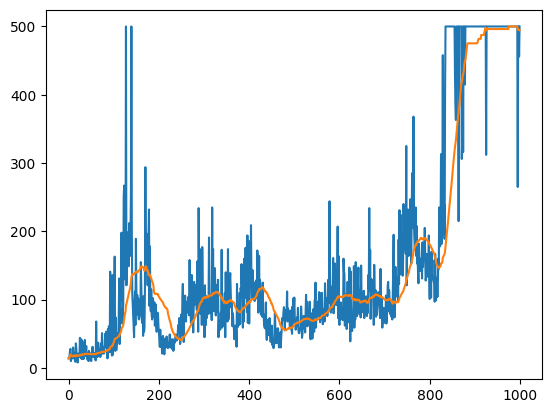

In [ ]:
import matplotlib.pyplot as plt
# Generate recent 50 interval average
average_reward = []
for idx in range(len(scores)):
    avg_list = np.empty(shape=(1,), dtype=int)
    if idx < 50:
        avg_list = scores[:idx+1]
    else:
        avg_list = scores[idx-49:idx+1]
    average_reward.append(np.average(avg_list))
# Plot
plt.plot(scores)
plt.plot(average_reward)

In [ ]:
def evaluate_agent(env, max_steps, n_eval_episodes, policy):
  """
  Evaluate the agent for ``n_eval_episodes`` episodes and returns average reward and std of reward.
  :param env: The evaluation environment
  :param n_eval_episodes: Number of episode to evaluate the agent
  :param policy: The Reinforce agent
  """
  episode_rewards = []
  for episode in range(n_eval_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards_ep = 0

    for step in range(max_steps):
      action, _ = policy.act(state)
      new_state, reward, done, info = env.step(action)
      total_rewards_ep += reward

      if done:
        break
      state = new_state
    episode_rewards.append(total_rewards_ep)
  mean_reward = np.mean(episode_rewards)
  std_reward = np.std(episode_rewards)

  return mean_reward, std_reward

In [ ]:
evaluate_agent(eval_env,
               cartpole_hyperparameters["max_t"],
               cartpole_hyperparameters["n_evaluation_episodes"],
               cartpole_policy)

(500.0, 0.0)

In [ ]:
def record_video(env, policy, out_directory, fps=30):
  """
  Generate a replay video of the agent
  :param env
  :param Qtable: Qtable of our agent
  :param out_directory
  :param fps: how many frame per seconds (with taxi-v3 and frozenlake-v1 we use 1)
  """
  images = []
  done = False
  state = env.reset()
  img = env.render(mode='rgb_array')
  images.append(img)
  while not done:
    # Take the action (index) that have the maximum expected future reward given that state
    action, _ = policy.act(state)
    state, reward, done, info = env.step(action) # We directly put next_state = state for recording logic
    img = env.render(mode='rgb_array')
    images.append(img)
  imageio.mimsave(out_directory + '.mp4', [np.array(img) for i, img in enumerate(images)], fps=fps)

In [ ]:
video_path = 'ty1'
record_video(env, cartpole_policy, video_path, 30)
from IPython.display import Video
Video('/content/'+video_path +'.mp4', embed=True)

/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


## Deep Sarsa

https://github.com/JohDonald/Deep-Q-Learning-Deep-SARSA-LunarLander-v2/blob/main/DSN_and_DQN_LunarLander.ipynb

https://github.com/rlcode/reinforcement-learning/tree/master/1-grid-world/6-deep-sarsa

In [ ]:
%%capture
!pip install python-opengl
!pip install ffmpeg
!pip install xvfb
!pip install pyvirtualdisplay
!pip install pyglet==1.5.1
!pip install imageio-ffmpeg
!pip install pyyaml==6.0
!pip install git+https://github.com/ntasfi/PyGame-Learning-Environment.git
!pip install git+https://github.com/simoninithomas/gym-games


In [ ]:
import numpy as np
import random

from collections import deque

import matplotlib.pyplot as plt
%matplotlib inline

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

# Gym
import gym
import gym_pygame

import imageio
from IPython.display import clear_output, display


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class QNetwork(nn.Module):
    def __init__(self, state_size, action_size, h_size):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, h_size)
        self.fc2 = nn.Linear(h_size, h_size*2)
        self.fc3 = nn.Linear(h_size*2, action_size)

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        state_action_values = self.fc3(x)
        return state_action_values


In [ ]:
env_id = "CartPole-v1"
# Create the env
env = gym.make(env_id)

# Create the evaluation env
eval_env = gym.make(env_id)

# Get the state space and action space
s_size = env.observation_space.shape[0]
a_size = env.action_space.n


In [ ]:
print("_____OBSERVATION SPACE_____ \n")
print("The State Space is: ", s_size)
print("Sample observation", env.observation_space.sample()) # Get a random observation

_____OBSERVATION SPACE_____ 

The State Space is:  4
Sample observation [ 2.7601786e+00  5.0478739e+37  3.6206949e-01 -3.3961461e+38]


In [ ]:
print("\n _____ACTION SPACE_____ \n")
print("The Action Space is: ", a_size)
print("Action Space Sample", env.action_space.sample()) # Take a random action


 _____ACTION SPACE_____ 

The Action Space is:  2
Action Space Sample 0


In [ ]:
class SARSAAgent:
    def __init__(self, state_size, action_size,h_size, epsilon=0.1, gamma=0.99, alpha=0.001):
        self.state_size = state_size
        self.action_size = action_size
        self.epsilon = epsilon
        self.gamma = gamma
        self.alpha = alpha
        self.q_network = QNetwork(state_size, action_size, h_size)
        self.optimizer = optim.Adam(self.q_network.parameters(), lr=alpha)

    def select_action(self, state):
        if random.random() < self.epsilon:
            return random.randint(0, self.action_size - 1)
        else:
            with torch.no_grad():
                q_values = self.q_network(state)
                return torch.argmax(q_values).item()

    def update_q_network(self, state, action, reward, next_state, next_action, done):
        self.optimizer.zero_grad()

        q_values = self.q_network(state)
        q_value = q_values[action]

        with torch.no_grad():
            next_q_values = self.q_network(next_state)
            next_q_value = next_q_values[next_action] if not done else 0.0

        target = reward + self.gamma * next_q_value
        loss = nn.MSELoss()(q_value, target)

        loss.backward()
        self.optimizer.step()

# Training the Deep SARSA agent on CartPole
def train_deep_sarsa():
    env = gym.make('CartPole-v1')
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n

    agent = SARSAAgent(state_size, action_size)

    episodes = 1000
    max_steps = env.spec.max_episode_steps

    for episode in range(episodes):
        state = torch.tensor(env.reset(), dtype=torch.float32).view(1, -1)
        action = agent.select_action(state)

        for step in range(max_steps):
            next_state, reward, done, _ = env.step(action)
            next_state = torch.tensor(next_state, dtype=torch.float32).view(1, -1)
            next_action = agent.select_action(next_state)

            agent.update_q_network(state, action, reward, next_state, next_action, done)

            state = next_state
            action = next_action

            if done:
                break

    env.close()


In [ ]:
class DQNAgent(object):
    def __init__(self, state_dim, action_dim, h_size):
        self.qnet = QNetwork(state_dim, action_dim, h_size)
        self.qnet_optim = torch.optim.Adam(self.qnet.parameters(), lr=0.001)
        self.discount_factor = 0.99
        self.MSELoss_function = nn.MSELoss()
        self.replay_buffer = ReplayBuffer()
        pass

    def epsilon_greedy_action(self, state, epsilon):
        if np.random.uniform(0, 1) < epsilon:
                return env.action_space.sample()  # choose random action
        else:
                network_output_to_numpy = self.qnet(state).data.numpy()
                return np.argmax(network_output_to_numpy)  # choose greedy action

    def update_Q_Network(self, state, next_state, action, reward, terminals):

        qsa = torch.gather(self.qnet(state), dim=1, index=action.long())
        qsa_next_action = self.qnet(next_state)
        qsa_next_action,_ = torch.max(qsa_next_action, dim=1, keepdim=True)
        not_terminals = 1 - terminals
        qsa_next_target = reward + not_terminals * self.discount_factor * qsa_next_action
        q_network_loss = self.MSELoss_function(qsa, qsa_next_target.detach())
        self.qnet_optim.zero_grad()
        q_network_loss.backward()
        self.qnet_optim.step()


    def update_Sarsa_Network(self, state, next_state, action, next_action, reward, terminals):

        qsa = torch.gather(self.qnet(state), dim=1, index=action.long())

        qsa_next_action = torch.gather(self.qnet(next_state), dim=1, index=next_action.long())

        not_terminals = 1 - terminals

        qsa_next_target = reward + not_terminals * (self.discount_factor * qsa_next_action)

        q_network_loss = self.MSELoss_function(qsa, qsa_next_target.detach())
        self.qnet_optim.zero_grad()
        q_network_loss.backward()
        self.qnet_optim.step()

    def update(self, update_rate):
        for i in range(update_rate):
            states, next_states, actions, rewards, terminals = self.replay_buffer.sample_minibatch(64)
            states = torch.Tensor(states)
            next_states = torch.Tensor(next_states)
            actions = torch.Tensor(actions)
            rewards = torch.Tensor(rewards)
            terminals = torch.Tensor(terminals)
            self.update_Q_Network(states, next_states, actions, rewards, terminals)

    def update_s(self, update_rate):
        for i in range(update_rate):
            states, next_states, actions, next_actions, rewards, terminals = self.replay_buffer.sample_minibatch_sarsa(64)
            states = torch.Tensor(states)
            next_states = torch.Tensor(next_states)
            actions = torch.Tensor(actions)
            next_actions = torch.Tensor(next_actions)
            rewards = torch.Tensor(rewards)
            terminals = torch.Tensor(terminals)
            self.update_Sarsa_Network(states, next_states, actions, next_actions, rewards, terminals)

    def best_move(self, state):

        return np.argmax(self.qnet(state).data.numpy())

In [ ]:
class ReplayBuffer(object):
    def __init__(self):
        self.buffer = []
        self.buffer_s = []

    def add_to_buffer(self, data):
        #data must be of the form (state,next_state,action,reward,terminal)
        self.buffer.append(data)

    def add_to_buffer_sarsa(self, data):
        #data must be of the form (state,next_state,action,n_action,reward,terminal)
        self.buffer_s.append(data)

    def sample_minibatch(self,minibatch_length):
        states = []
        next_states = []
        actions = []
        rewards = []
        terminals = []
        for i in range(minibatch_length):
            random_int = np.random.randint(0, len(self.buffer)-1)
            transition = self.buffer[random_int]
            states.append(transition[0])
            next_states.append(transition[1])
            actions.append(transition[2])
            rewards.append(transition[3])
            terminals.append(transition[4])
        return torch.Tensor(states), torch.Tensor(next_states), torch.Tensor(actions), torch.Tensor(rewards), torch.Tensor(terminals)

    def sample_minibatch_sarsa(self,minibatch_length):
        states = []
        next_states = []
        actions = []
        next_actions = []
        rewards = []
        terminals = []
        for i in range(minibatch_length):
            random_int = np.random.randint(0, len(self.buffer_s)-1)
            transition = self.buffer_s[random_int]
            states.append(transition[0])
            next_states.append(transition[1])
            actions.append(transition[2])
            next_actions.append(transition[3])
            rewards.append(transition[4])
            terminals.append(transition[5])
        return torch.Tensor(states), torch.Tensor(next_states), torch.Tensor(actions), torch.Tensor(next_actions), torch.Tensor(rewards), torch.Tensor(terminals)


In [16]:
agent = DQNAgent(s_size, a_size, h_size= 20)#SARSAAgent(s_size, a_size, h_size= 20)#
number_of_episodes = 600
max_time_steps = 2000
epsilon = 1
reward_list_sarsa = []
final_rewards = []

np.random.seed(0)
for episode in range(number_of_episodes):
    state = env.reset()

    reward_sum = 0

    action = agent.epsilon_greedy_action(torch.from_numpy(state).float(), epsilon)

    state_1, reward, terminal, _ = env.step(action)

    #Checks for early Finish
    if terminal:

        action_1 = agent.epsilon_greedy_action(torch.from_numpy(state_1).float(), epsilon)
        agent.replay_buffer.add_to_buffer_sarsa((state, state_1, [action], [action_1], [reward],[terminal]))

        reward_sum += reward

        final_rewards.append(reward)

        reward_list_sarsa.append(reward_sum)

        clear_output(wait=True)
        print('Early finish!', 'reward =', reward)
        print('episode:', episode, 'sum_of_rewards_for_episode:', reward_sum, 'final reward', \
                      reward, 'epsilon:', epsilon)

    #If not finished after first action - continue learning
    else:
        for i in range(max_time_steps):

            action_1 = agent.epsilon_greedy_action(torch.from_numpy(state_1).float(), epsilon)

            state_2, reward_1, terminal_1, _ = env.step(action_1)

            agent.replay_buffer.add_to_buffer_sarsa((state, state_1, [action], [action_1], [reward],[terminal]))

            reward_sum += reward

            state = state_1
            state_1 = state_2
            action = action_1
            reward = reward_1
            terminal = terminal_1

            if terminal:

                action_1 = agent.epsilon_greedy_action(torch.from_numpy(state_1).float(), epsilon)

                agent.replay_buffer.add_to_buffer_sarsa((state, state_1, [action], [action_1], [reward],[terminal]))

                reward_sum += reward

                final_rewards.append(reward)

                reward_list_sarsa.append(reward_sum)

                clear_output(wait=True)
                print('episode:', episode, 'sum_of_rewards_for_episode:', reward_sum, 'final reward', \
                      reward, 'epsilon:', epsilon)


                break

    agent.update_s(128)

    if epsilon > 0.2:
        epsilon *= 0.995

    if epsilon <= 0.2:
        epsilon = 0.2

episode: 599 sum_of_rewards_for_episode: 500.0 final reward 1.0 epsilon: 0.2


In [18]:
def m_a(values, window=50):
    weight = np.repeat(1.0, window)/window
    smas = np.convolve(values,weight,'valid')
    return smas

In [19]:
smas = m_a(reward_list_sarsa)

Text(0.5, 1.0, 'Deep SARSA learning (600 episodes training)')

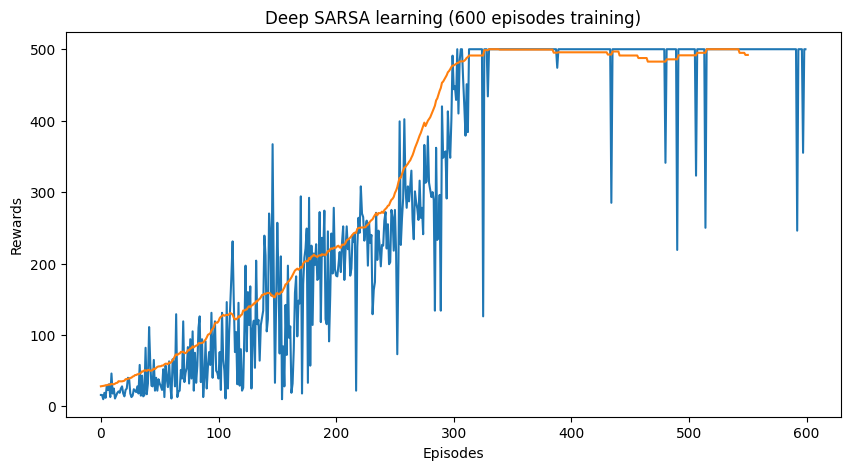

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(reward_list_sarsa)
ax.plot(smas)
ax.set_ylabel('Rewards')
ax.set_xlabel('Episodes')
ax.set_title('Deep SARSA learning (600 episodes training)')

In [ ]:
ax.plot(reward_list_sarsa)
ax.plot(smas)
ax.set_ylabel('Rewards')
ax.set_xlabel('Episodes')
ax.set_title('Deep SARSA learning (600 episodes training)')
#plt.savefig('Sarsa600epma', transparent=True)

Text(0.5, 1.0, 'Deep SARSA learning (600 episodes training)')

In [ ]:
def record_video(env, agent, out_directory, fps=30):
  """
  Generate a replay video of the agent
  :param env
  :param Qtable: Qtable of our agent
  :param out_directory
  :param fps: how many frame per seconds (with taxi-v3 and frozenlake-v1 we use 1)
  """
  images = []
  done = False
  state = env.reset()
  img = env.render(mode='rgb_array')
  images.append(img)
  while not done:
    # Take the action (index) that have the maximum expected future reward given that state
    action, _ =  agent.select_action(state)
    state, reward, done, info = env.step(action) # We directly put next_state = state for recording logic
    img = env.render(mode='rgb_array')
    images.append(img)
  imageio.mimsave(out_directory + '.mp4', [np.array(img) for i, img in enumerate(images)], fps=fps)

In [21]:
# video_path = 'ty1'
# record_video(env, agent, video_path, 30)
# from IPython.display import Video
# Video('/content/'+video_path +'.mp4', embed=True)